###### WeatherPy

**Note**

- Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/Blaylock_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
weather_api_key

'23219042e6443f05d11862327128732b'

### Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

In [4]:
from pprint import pprint
test_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23219042e6443f05d11862327128732b&q=albany"
data = requests.get(test_url).json()


In [5]:
pprint(data)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 42.6, 'lon': -73.97},
 'dt': 1604924797,
 'id': 5106841,
 'main': {'feels_like': 37.67,
          'humidity': 100,
          'pressure': 1028,
          'temp': 40.73,
          'temp_max': 46,
          'temp_min': 35.6},
 'name': 'Albany',
 'sys': {'country': 'US',
         'id': 3273,
         'sunrise': 1604922024,
         'sunset': 1604957952,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'fog', 'icon': '50d', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 273, 'speed': 1.74}}


In [6]:
data['coord']

{'lon': -73.97, 'lat': 42.6}

### Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print('Beginning Data Retrieval')
print('-------------------------')

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list
for city in cities:
    # Group cities in sets of 50 for logging purposes
    if record_count <= 49:
        record_count += 1
        #record_count = record_count + 1
    else:
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city
    query_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()
        
        # Parse out the City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        
        # Append the City information into city_data list
        city_data.append([city, city_lat, city_lon, city_temp, city_hum, city_cloud, city_wind, city_country, city_date])
        time.sleep(.2)
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print('----------------------')
print('Data Retrieval Complete')
print('----------------------')

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | changji
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | alyangula
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 1 | korla
Processing Record 11 of Set 1 | nyurba
Processing Record 12 of Set 1 | rio gallegos
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | amantea
Processing Record 15 of Set 1 | plettenberg bay
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | aplahoue
Processing Record 18 of Set 1 | jackson
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | coffs harbour
Processing Record 21 of Set 1 | parintins
Processing Record 22 of Set 1 | kapaa
Processin

Processing Record 39 of Set 4 | meulaboh
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | konstantinovo
Processing Record 42 of Set 4 | grindavik
Processing Record 43 of Set 4 | cayenne
Processing Record 44 of Set 4 | weston
Processing Record 45 of Set 4 | half moon bay
Processing Record 46 of Set 4 | puerto narino
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | lompoc
Processing Record 49 of Set 4 | ossora
Processing Record 50 of Set 4 | te anau
Processing Record 1 of Set 5 | taltal
Processing Record 2 of Set 5 | kalomo
City not found. Skipping...
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | danesti
Processing Record 5 of Set 5 | port hawkesbury
Processing Record 6 of Set 5 | bilma
Processing Record 7 of Set 5 | nebbi
Processing Record 8 of Set 5 | riyadh
Processing Record 9 of Set 5 | kilmez
City not found. Skipping...
Processing Record 10 of Set 5 | phan rang
City not found. Skipping...
Processing Record 11 o

Processing Record 25 of Set 8 | dalvik
Processing Record 26 of Set 8 | the pas
Processing Record 27 of Set 8 | khvorostyanka
Processing Record 28 of Set 8 | adrar
Processing Record 29 of Set 8 | kovdor
Processing Record 30 of Set 8 | ponta delgada
Processing Record 31 of Set 8 | lewistown
Processing Record 32 of Set 8 | neuquen
Processing Record 33 of Set 8 | balaipungut
Processing Record 34 of Set 8 | dauriya
Processing Record 35 of Set 8 | mareeba
Processing Record 36 of Set 8 | senador jose porfirio
Processing Record 37 of Set 8 | quelimane
Processing Record 38 of Set 8 | kodiak
Processing Record 39 of Set 8 | salekhard
Processing Record 40 of Set 8 | mirabela
Processing Record 41 of Set 8 | ivanava
Processing Record 42 of Set 8 | goure
Processing Record 43 of Set 8 | samusu
City not found. Skipping...
Processing Record 44 of Set 8 | saleaula
City not found. Skipping...
Processing Record 45 of Set 8 | rio grande
Processing Record 46 of Set 8 | yelizovo
Processing Record 47 of Set 8 

Processing Record 13 of Set 12 | pasighat
Processing Record 14 of Set 12 | praia da vitoria
Processing Record 15 of Set 12 | belawan
Processing Record 16 of Set 12 | lac du bonnet
Processing Record 17 of Set 12 | karakose
City not found. Skipping...
Processing Record 18 of Set 12 | cazaje
City not found. Skipping...
Processing Record 19 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 20 of Set 12 | moerai
Processing Record 21 of Set 12 | northam
Processing Record 22 of Set 12 | dhidhdhoo
Processing Record 23 of Set 12 | marfino
Processing Record 24 of Set 12 | sorochinsk
Processing Record 25 of Set 12 | olafsvik
Processing Record 26 of Set 12 | cap-aux-meules
Processing Record 27 of Set 12 | juneau
Processing Record 28 of Set 12 | plattsburgh
Processing Record 29 of Set 12 | miri
Processing Record 30 of Set 12 | arcachon
Processing Record 31 of Set 12 | datong
Processing Record 32 of Set 12 | sao felix do xingu
Processing Record 33 of Set 12 | bagotville
Proces

### Convert Raw Data to DataFrame
- Export the city data into a .csv.
- Display the DataFrame

In [8]:
city_data

[['changji', 44.02, 87.32, 42.8, 41, 0, 2.24, 'CN', 1604924806],
 ['ponta do sol', 32.67, -17.1, 69.8, 60, 40, 10.29, 'PT', 1604924806],
 ['provideniya', 64.38, -173.3, 32.18, 96, 100, 11.39, 'RU', 1604924807],
 ['fortuna', 40.6, -124.16, 32, 76, 1, 8.05, 'US', 1604924590],
 ['alyangula', -13.85, 136.42, 82.4, 78, 31, 4.7, 'AU', 1604924807],
 ['carnarvon', -24.87, 113.63, 66.2, 93, 90, 26.4, 'AU', 1604924808],
 ['port alfred', -33.59, 26.89, 62.2, 75, 100, 20.11, 'ZA', 1604924808],
 ['busselton', -33.65, 115.33, 54, 69, 43, 17.09, 'AU', 1604924808],
 ['korla', 41.76, 86.15, 44.98, 47, 41, 4, 'CN', 1604924809],
 ['nyurba', 63.28, 118.33, 8.28, 94, 100, 7.87, 'RU', 1604924809],
 ['rio gallegos', -51.62, -69.22, 42.8, 75, 90, 8.05, 'AR', 1604924584],
 ['watsa', 3.04, 29.54, 75.94, 89, 62, 4.61, 'CD', 1604924810],
 ['amantea', 39.13, 16.07, 70, 68, 16, 10.29, 'IT', 1604924810],
 ['plettenberg bay', -34.05, 23.37, 62.56, 50, 64, 12.8, 'ZA', 1604924810],
 ['butaritari', 3.07, 172.79, 81.48, 

In [9]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns= ["city", "city_lat", "city_lon", "city_temp", "city_hum", "city_cloud", "city_wind", "city_country", "city_date"])
    
# Show Record Count
city_data_df.head()

,city,city_lat,city_lon,city_temp,city_hum,city_cloud,city_wind,city_country,city_date
0,changji,44.02,87.32,42.80,41,0,2.24,CN,1604924806
1,ponta do sol,32.67,-17.10,69.80,60,40,10.29,PT,1604924806
2,provideniya,64.38,-173.30,32.18,96,100,11.39,RU,1604924807
3,fortuna,40.60,-124.16,32.00,76,1,8.05,US,1604924590
4,alyangula,-13.85,136.42,82.40,78,31,4.70,AU,1604924807


In [10]:
# Display the City Data Frame
city_data_df.count()

city            600
city_lat        600
city_lon        600
city_temp       600
city_hum        600
city_cloud      600
city_wind       600
city_country    600
city_date       600
dtype: int64

### Inspect the data and remove the cities where the humidity > 100%.

- Skip this step if there are no cities that have humidity > 100%.

In [11]:
city_data_df.describe()

,city_lat,city_lon,city_temp,city_hum,city_cloud,city_wind,city_date
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02
mean,19.232433,21.768500,58.773450,71.850000,52.571667,8.497550,1.604925e+09
std,33.767963,87.764216,24.815259,21.232181,38.100932,6.526938,9.105213e+01
min,-54.800000,-179.170000,-17.860000,1.000000,0.000000,0.020000,1.604925e+09
25%,-8.762500,-56.297500,42.800000,63.000000,14.000000,3.410000,1.604925e+09
50%,23.735000,25.555000,64.000000,76.000000,60.000000,6.930000,1.604925e+09
75%,47.052500,99.055000,78.800000,88.000000,90.000000,11.410000,1.604925e+09
max,78.220000,179.320000,107.980000,100.000000,100.000000,41.790000,1.604925e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
humidity_data = city_data_df[(city_data_df["city_hum"]>100)].index
clean_data = city_data_df.drop(humidity_data, inplace=False)
clean_data.head()

,city,city_lat,city_lon,city_temp,city_hum,city_cloud,city_wind,city_country,city_date
0,changji,44.02,87.32,42.80,41,0,2.24,CN,1604924806
1,ponta do sol,32.67,-17.10,69.80,60,40,10.29,PT,1604924806
2,provideniya,64.38,-173.30,32.18,96,100,11.39,RU,1604924807
3,fortuna,40.60,-124.16,32.00,76,1,8.05,US,1604924590
4,alyangula,-13.85,136.42,82.40,78,31,4.70,AU,1604924807


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_data.count()

city            600
city_lat        600
city_lon        600
city_temp       600
city_hum        600
city_cloud      600
city_wind       600
city_country    600
city_date       600
dtype: int64

In [14]:
# Export the City_Data into a csv
clean_data.to_csv(output_data_file)

In [15]:
# Extract relevant fields from the data frame

### Latitude vs. Temperature Plot

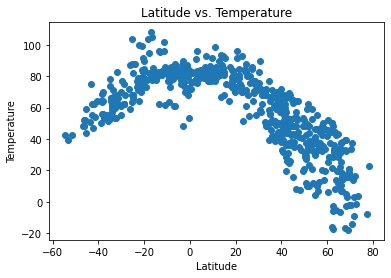

In [16]:
# Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties

x_values = clean_data['city_lat']
y_values = clean_data['city_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')


# Show plot
plt.show()

### Latitude vs. Humidity Plot

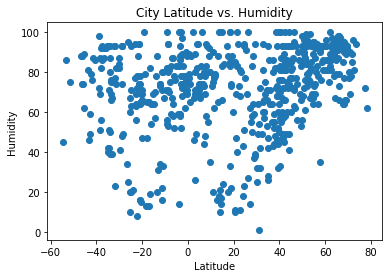

In [17]:
# Build the scatter plots for latitude vs. humidity


# Incorporate the other graph properties

x_values = clean_data['city_lat']
y_values = clean_data['city_hum']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

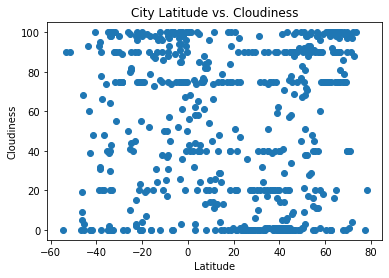

In [18]:
# Build the scatter plots for latitude vs. cloudiness


# Incorporate the other graph properties

x_values = clean_data['city_lat']
y_values = clean_data['city_cloud']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

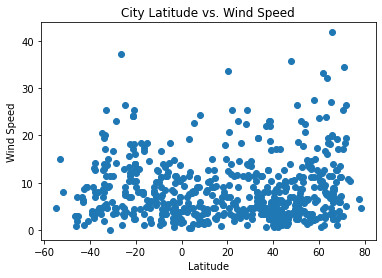

In [19]:
# Build the scatter plots for latitude vs. wind speed


# Incorporate the other graph properties

x_values = clean_data['city_lat']
y_values = clean_data['city_wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Show plot
plt.show()

### Linear Regression

In [20]:
# Create a function to create Linear Regression plots


In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern = clean_data.groupby('city_lat')
northern.first()

,city,city_lon,city_temp,city_hum,city_cloud,city_wind,city_country,city_date
city_lat,,,,,,,,
-54.80,ushuaia,-68.30,42.80,45,0,4.70,AR,1604924815
-53.15,punta arenas,-70.92,39.20,86,90,14.99,CL,1604924830
-51.62,rio gallegos,-69.22,42.80,75,90,8.05,AR,1604924584
-46.60,bluff,168.33,48.00,88,0,3.00,NZ,1604924832
-46.28,kaitangata,169.85,52.00,74,9,0.83,NZ,1604924915
...,...,...,...,...,...,...,...,...
71.97,khatanga,102.50,16.74,96,100,19.42,RU,1604924847
72.79,upernavik,-56.15,-1.64,81,88,10.87,GL,1604924946
73.51,dikson,80.55,3.65,94,100,10.31,RU,1604924845


### Max Temp vs. Latitude Linear Regression

The r-value is: 0.7202668224182556


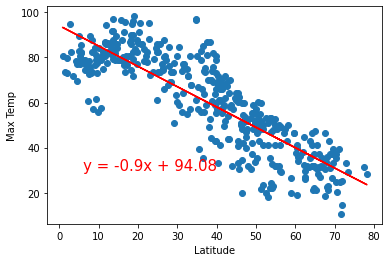

In [22]:
# Linear regression on Northern Hemisphere


The r-value is: 0.46441481952163494


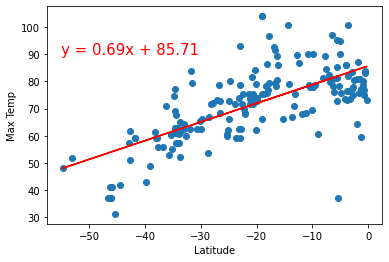

In [25]:
# Linear regression on Southern Hemisphere


### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.054984702387992135


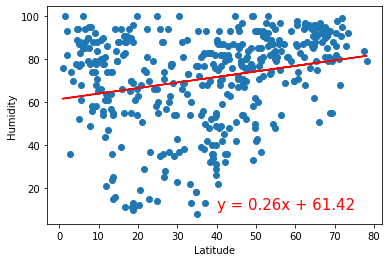

In [26]:
# Northern Hemisphere


The r-value is: 0.0010657268979034798


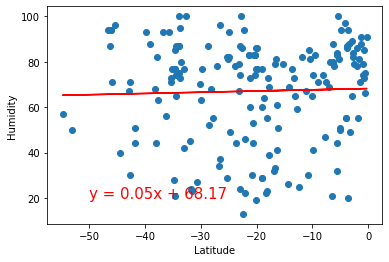

In [27]:
# Southern Hemisphere


### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.014537789747088272


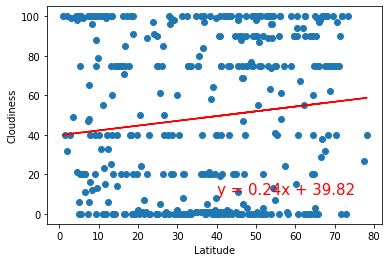

In [28]:
# Northern Hemisphere


The r-value is: 0.10332914265051853


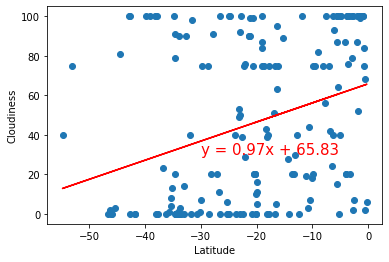

In [29]:
# Southern Hemisphere


### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.031284983638349965


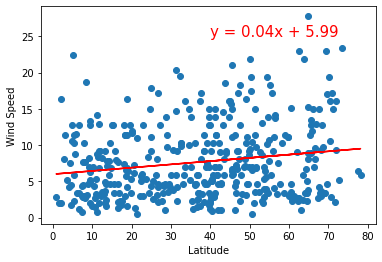

In [31]:
# Northern Hemisphere


The r-value is: 0.023550214994640835


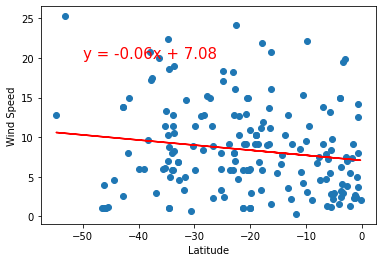

In [32]:
# Southern Hemisphere
